In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


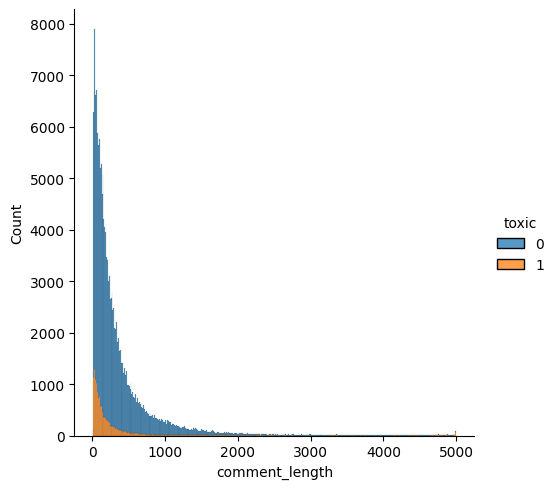

In [4]:
import seaborn as sns
# comment_length=df['comment_text'].apply(lambda row: len(row))
df['comment_length']=df['comment_text'].apply(lambda row: len(row))
sns.displot(
    data=df,
    x="comment_length",
    hue='toxic',
    multiple="stack"
    # xlabel="comment_length"
)

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [6]:
toxic_data = df[df['toxic'] == 1]
toxic_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,319
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,57
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,648
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,40


In [7]:
print(
    'max', toxic_data['comment_length'].max(),
    'min', toxic_data['comment_length'].min(),
    'mean', toxic_data['comment_length'].mean(),
    'median', toxic_data['comment_length'].median(),
    '75%', toxic_data['comment_length'].quantile(0.75),
)


max 5000 min 8 mean 295.201108318835 median 123.0 75% 271.0


In [8]:
df.drop("comment_length",axis=1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
162072,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
162073,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
162074,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
162075,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [10]:
train_df=pd.read_csv('train.csv')
labels = train_df.columns[2:].to_numpy()

train_sentences = train_df["comment_text"]
train_labels = train_df.iloc[:, 2:]

test_df = pd.read_csv('test.csv')
test_sentences = test_df["comment_text"]

ParserError: Error tokenizing data. C error: EOF inside string starting at row 141442

In [11]:
train_sentences


0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
162072    ":::::And for the second time of asking, when ...
162073    You should be ashamed of yourself \n\nThat is ...
162074    Spitzer \n\nUmm, theres no actual article for ...
162075    And it looks like it was actually you who put ...
162076    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 162077, dtype: object

In [12]:
import re


In [13]:
import string
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_special_chars(text):
    return text.replace("\n", " ").replace("\t", " ").strip()

def normalize_spacing(text):
    return " ".join(text.split())

def process_text(text):
    text= clean_text(text)
    text = remove_punctuation(text)
    text = remove_special_chars(text)
    text = normalize_spacing(text)
    return text


# apply preprocessing
train_sentences = train_sentences.map(process_text)
# val_sentences = val_sentences.map(process_text)
test_sentences = test_sentences.map(process_text)

NameError: name 'test_sentences' is not defined

In [14]:
print(train_sentences)

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i am s...
2         hey man i am really not trying to edit war it ...
3         more i cannot make any real suggestions on imp...
4         you sir are my hero any chance you remember wh...
                                ...                        
162072    and for the second time of asking when your vi...
162073    you should be ashamed of yourself that is a ho...
162074    spitzer umm theres no actual article for prost...
162075    and it looks like it was actually you who put ...
162076    and i really do not think you understand i cam...
Name: comment_text, Length: 162077, dtype: object


In [ ]:
print(test_sentences)

0         yo bitch ja rule is more succesful then you wi...
1                   from rfc the title is fine as it is imo
2                            sources zawe ashton on lapland
3         if you have a look back at the source the info...
4                 i do not anonymously edit articles at all
                                ...                        
153159    i totally agree this stuff is nothing but too ...
153160    throw from out field to home plate does it get...
153161    okinotorishima categories i see your changes a...
153162    one of the founding nations of the eu germany ...
153163    stop already your bullshit is not welcome here...
Name: comment_text, Length: 153164, dtype: object


SMOTE Analysis is done only to implement algorithms like SoftMax and Naive Bayes algorithm


TF- IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_X = train_df['comment_text']
test_X = test_df['comment_text']

vectorizer = TfidfVectorizer(max_features=5000)
train_vect = vectorizer.fit_transform(train_X)
test_vect = vectorizer.transform(test_X)

train_vect.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#***************************  Imbalance Data **************************
from collections import Counter
print('toxic',sorted(Counter(train_df['toxic']).items()))
print('severe_toxic',sorted(Counter(train_df['severe_toxic']).items()))
print('obscene',sorted(Counter(train_df['obscene']).items()))
print('threat',sorted(Counter(train_df['threat']).items()))
print('insult',sorted(Counter(train_df['insult']).items()))
print('identity_hate',sorted(Counter(train_df['identity_hate']).items()))

toxic [(0, 144277), (1, 15294)]
severe_toxic [(0, 157976), (1, 1595)]
obscene [(0, 151122), (1, 8449)]
threat [(0, 159093), (1, 478)]
insult [(0, 151694), (1, 7877)]
identity_hate [(0, 158166), (1, 1405)]


SMOTE


In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
oversampled_data = {}

smote = SMOTE(sampling_strategy='auto', random_state=42)

for label in labels:
    y = train_df[label].values

    # SMOTE
    X_resampled, y_resampled = smote.fit_resample(train_vect, y)

    # oversampled
    oversampled_data[label] = (X_resampled, y_resampled)

    unique, counts = np.unique(y_resampled, return_counts=True)
    class_counts = dict(zip(unique, counts))
    print(f'label : {label}')
    print('0 =>', class_counts[0])
    print('1 =>', class_counts[1])

label : toxic
0 => 144277
1 => 144277
label : severe_toxic
0 => 157976
1 => 157976
label : obscene
0 => 151122
1 => 151122
label : threat
0 => 159093
1 => 159093
label : insult
0 => 151694
1 => 151694
label : identity_hate
0 => 158166
1 => 158166


In [ ]:
oversampled_data

{'toxic': (<288554x5000 sparse matrix of type '<class 'numpy.float64'>'
  	with 9503254 stored elements in Compressed Sparse Row format>,
  array([0, 0, 0, ..., 1, 1, 1])),
 'severe_toxic': (<315952x5000 sparse matrix of type '<class 'numpy.float64'>'
  	with 9534516 stored elements in Compressed Sparse Row format>,
  array([0, 0, 0, ..., 1, 1, 1])),
 'obscene': (<302244x5000 sparse matrix of type '<class 'numpy.float64'>'
  	with 9571372 stored elements in Compressed Sparse Row format>,
  array([0, 0, 0, ..., 1, 1, 1])),
 'threat': (<318186x5000 sparse matrix of type '<class 'numpy.float64'>'
  	with 12373691 stored elements in Compressed Sparse Row format>,
  array([0, 0, 0, ..., 1, 1, 1])),
 'insult': (<303388x5000 sparse matrix of type '<class 'numpy.float64'>'
  	with 9527628 stored elements in Compressed Sparse Row format>,
  array([0, 0, 0, ..., 1, 1, 1])),
 'identity_hate': (<316332x5000 sparse matrix of type '<class 'numpy.float64'>'
  	with 9765448 stored elements in Compress

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    # plt.legend(label_1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Soft Max


Category: toxic
Test accuracy: 0.9301519640969659
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     28854
           1       0.92      0.94      0.93     28857

    accuracy                           0.93     57711
   macro avg       0.93      0.93      0.93     57711
weighted avg       0.93      0.93      0.93     57711

model 1 AUC score: 0.9301513468947736
Category: severe_toxic
Test accuracy: 0.9779715465810005
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     31656
           1       0.96      1.00      0.98     31535

    accuracy                           0.98     63191
   macro avg       0.98      0.98      0.98     63191
weighted avg       0.98      0.98      0.98     63191

model 1 AUC score: 0.978006555948942
Category: obscene
Test accuracy: 0.9548048768383265
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     30250
   

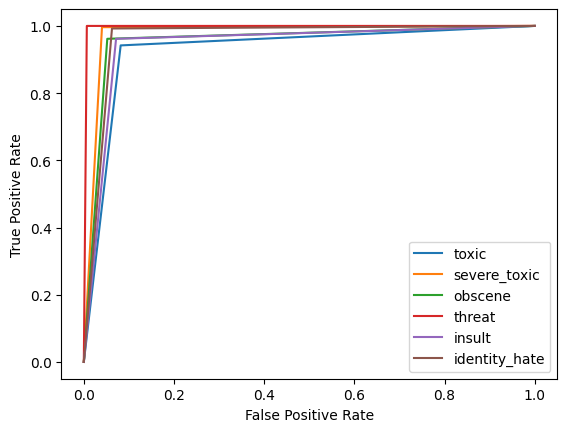

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
models = {}

for label in labels:
    X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(oversampled_data[label][0], oversampled_data[label][1], test_size=0.2, random_state=42)

    softmax_regression_model_label = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    softmax_regression_model_label.fit(X_train_label, y_train_label)

    y_pred_label = softmax_regression_model_label.predict(X_test_label)

    accuracy_label = accuracy_score(y_test_label, y_pred_label)
    report_label = classification_report(y_test_label, y_pred_label)

    print(f'Category: {label}')
    print(f'Test accuracy: {accuracy_label}')
    print(report_label)
    plot_roc_curve(y_test_label, y_pred_label)
    print(f'model 1 AUC score: {roc_auc_score(y_test_label, y_pred_label)}')

    models[label] = softmax_regression_model_label
plt.legend(labels)

Testing the model with Test Data

In [ ]:
submission = pd.DataFrame({'id': test_df['id']})
for label in labels:
    y_prob_label = softmax_regression_model_label.predict_proba(test_vect)[:, 1]
    submission[label] = y_prob_label

submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.851151,0.851151,0.851151,0.851151,0.851151,0.851151
1,0000247867823ef7,0.011568,0.011568,0.011568,0.011568,0.011568,0.011568
2,00013b17ad220c46,0.333720,0.333720,0.333720,0.333720,0.333720,0.333720
3,00017563c3f7919a,0.000477,0.000477,0.000477,0.000477,0.000477,0.000477
4,00017695ad8997eb,0.139247,0.139247,0.139247,0.139247,0.139247,0.139247


Naive Bayes

Category: toxic
Test accuracy: 0.883557727296356
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     28854
           1       0.90      0.86      0.88     28857

    accuracy                           0.88     57711
   macro avg       0.88      0.88      0.88     57711
weighted avg       0.88      0.88      0.88     57711

model 1 AUC score: 0.8835587538361933
Category: severe_toxic
Test accuracy: 0.9603899289455777
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     31656
           1       0.95      0.97      0.96     31535

    accuracy                           0.96     63191
   macro avg       0.96      0.96      0.96     63191
weighted avg       0.96      0.96      0.96     63191

model 1 AUC score: 0.9604131468342555
Category: obscene
Test accuracy: 0.9052093500306043
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     30250
   

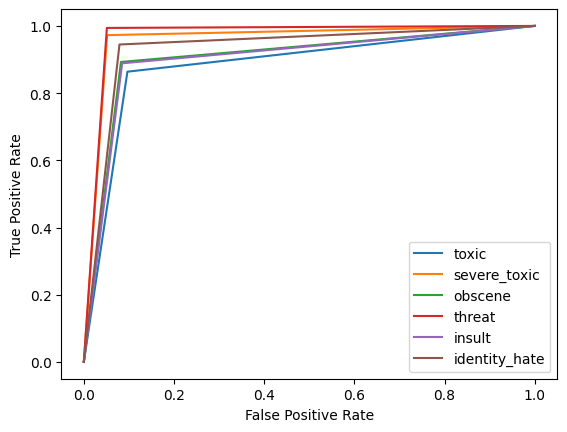

In [ ]:
from sklearn.naive_bayes import MultinomialNB
models = {}

for label in labels:
    X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(oversampled_data[label][0],oversampled_data[label][1],test_size=0.2, random_state=42)

    nb_model = MultinomialNB()
    nb_model.fit(X_train_label, y_train_label)

    y_pred_label = nb_model.predict(X_test_label)
    accuracy = accuracy_score(y_test_label, y_pred_label)
    report = classification_report(y_test_label, y_pred_label)

    print(f'Category: {label}')
    print(f'Test accuracy: {accuracy}')
    print(report)
    plot_roc_curve(y_test_label, y_pred_label)
    print(f'model 1 AUC score: {roc_auc_score(y_test_label, y_pred_label)}')
    models[label] = nb_model
plt.legend(labels)


Testing the model with Test Data

In [ ]:
submission_nb = pd.DataFrame({'id': test_df['id']})
for label in labels:
    y_prob_label = nb_model.predict_proba(test_vect)[:, 1]
    submission_nb[label] = y_prob_label

submission_nb.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.996645,0.996645,0.996645,0.996645,0.996645,0.996645
1,0000247867823ef7,0.011185,0.011185,0.011185,0.011185,0.011185,0.011185
2,00013b17ad220c46,0.156761,0.156761,0.156761,0.156761,0.156761,0.156761
3,00017563c3f7919a,0.008144,0.008144,0.008144,0.008144,0.008144,0.008144
4,00017695ad8997eb,0.212136,0.212136,0.212136,0.212136,0.212136,0.212136


In [ ]:
submission_nb

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.996645,0.996645,0.996645,0.996645,0.996645,0.996645
1,0000247867823ef7,0.011185,0.011185,0.011185,0.011185,0.011185,0.011185
2,00013b17ad220c46,0.156761,0.156761,0.156761,0.156761,0.156761,0.156761
3,00017563c3f7919a,0.008144,0.008144,0.008144,0.008144,0.008144,0.008144
4,00017695ad8997eb,0.212136,0.212136,0.212136,0.212136,0.212136,0.212136
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.461953,0.461953,0.461953,0.461953,0.461953,0.461953
153160,fffd7a9a6eb32c16,0.491786,0.491786,0.491786,0.491786,0.491786,0.491786
153161,fffda9e8d6fafa9e,0.006174,0.006174,0.006174,0.006174,0.006174,0.006174
153162,fffe8f1340a79fc2,0.225452,0.225452,0.225452,0.225452,0.225452,0.225452


LSTM
(Using only train.csv)

In [15]:
train_1_df=train_df

In [16]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
162072,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
162073,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
162074,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
162075,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [17]:
train_1_df["comment_text"]=train_sentences

In [18]:
train_1_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
162072,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
162073,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
162074,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
162075,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training set, test set and validation set
train_1_df, test_df = train_test_split(train_1_df, train_size=0.8, random_state=210)
train_1_df, val_df = train_test_split(train_1_df, train_size=0.8, random_state=20)

# Split the dataset into sentences and labels
train_sentences = train_1_df["comment_text"]
train_labels = train_1_df.iloc[:, 2:]

val_sentences = val_df["comment_text"]
val_labels = val_df.iloc[:, 2:]

test_sentences = test_df["comment_text"]
test_labels = test_df.iloc[:, 2:]

In [20]:
train_sentences

75849     i think a warning is in order this block shoul...
40029     rock of love bus vh1 com they have true inform...
134016    agree i will add a short but impressive list o...
105035    you are an asshole you are an asshole you are ...
16925                                   i am agree with you
                                ...                        
89789     additionally you are removing sourced informat...
143939    i know but i abused as im very angry shahid al...
30646     2005 utc i did not characterize it as a theory...
118931    san salvador crime section it is not fair for ...
29208     do you have any specific examples that you bel...
Name: comment_text, Length: 103728, dtype: object

In [21]:
print(clean_text("I'm Souvick and I'd love to have this!"))

i am souvick and i would love to have this


In [22]:
train_sentences

75849     i think a warning is in order this block shoul...
40029     rock of love bus vh1 com they have true inform...
134016    agree i will add a short but impressive list o...
105035    you are an asshole you are an asshole you are ...
16925                                   i am agree with you
                                ...                        
89789     additionally you are removing sourced informat...
143939    i know but i abused as im very angry shahid al...
30646     2005 utc i did not characterize it as a theory...
118931    san salvador crime section it is not fair for ...
29208     do you have any specific examples that you bel...
Name: comment_text, Length: 103728, dtype: object

In [23]:
train_sentences = train_sentences.to_numpy()
train_labels = train_labels.to_numpy()
val_sentences = val_sentences.to_numpy()
val_labels = val_labels.to_numpy()
test_sentences =test_sentences.to_numpy()
test_labels=test_labels.to_numpy()

In [24]:
train_sentences

array(['i think a warning is in order this block should be lifted and replaced with a warning you should not abuse your power in such a way to tell you the truth i am sure your wiki centric life would be unfufilling were it not for vandals like me',
       'rock of love bus vh1 com they have true information about the show',
       'agree i will add a short but impressive list of facts of why it is spelled as kyiv in english language 1 ukrainian government insists on kyiv spelling 2 the state department of the u s issued a directive to write kyiv 3 the prime minister of the u k calls the city kyiv http www number10 gov uk page20199 4 united nations multilingual terminology database the ultimate body on geographical names approved it as kyiv http unterm un org dgaacs unterm nsf webview b57bf6ab5f06749b85256dc700440aad opendocument 5 major english speaking governments worldwide switched to kyiv spelling 6 cia refers to the city as kyiv https www cia gov library publications the world fac

In [25]:
vocab = set()
for sentence in train_sentences:
    for word in sentence.split():
        vocab.add(word)

vocab_size = len(vocab)

vocab_size=200000

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_sentences)

# get limited vocabulary from tokenizer word index

# import json

# vocab = {}
# for word, index in tokenizer.word_index.items():
#     if index <= vocab_size:
#         vocab[word] = index

# print(len(vocab))

# with open("tokenizer_dictionary.json", "w") as file:
#     json.dump(vocab, file)

# convert sentences to integer sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequences=tokenizer.texts_to_sequences(test_sentences)

In [26]:
len(train_sequences),len(train_sentences)

(103728, 103728)

In [27]:
train_sequences

[[3,
  67,
  7,
  510,
  8,
  12,
  498,
  14,
  187,
  55,
  18,
  5224,
  4,
  1596,
  22,
  7,
  510,
  6,
  55,
  11,
  989,
  21,
  563,
  12,
  105,
  7,
  107,
  2,
  351,
  6,
  1,
  573,
  3,
  41,
  190,
  21,
  148,
  7609,
  307,
  38,
  18,
  70514,
  83,
  10,
  11,
  13,
  2077,
  52,
  39],
 [1410, 5, 507, 4983, 17698, 226, 49, 16, 357, 101, 37, 1, 299],
 [261,
  3,
  35,
  147,
  7,
  724,
  27,
  5773,
  161,
  5,
  417,
  5,
  75,
  10,
  8,
  3515,
  19,
  6405,
  12,
  262,
  354,
  167,
  3359,
  617,
  6832,
  15,
  6405,
  1224,
  169,
  1,
  281,
  1970,
  5,
  1,
  223,
  219,
  3174,
  7,
  16854,
  2,
  323,
  6405,
  228,
  1,
  2427,
  2541,
  5,
  1,
  223,
  1359,
  1858,
  1,
  571,
  6405,
  172,
  311,
  70515,
  2468,
  673,
  70516,
  364,
  603,
  1877,
  19735,
  3329,
  3642,
  1,
  4512,
  1094,
  15,
  5774,
  538,
  2926,
  10,
  19,
  6405,
  172,
  49025,
  1468,
  349,
  70517,
  49025,
  14886,
  70518,
  70519,
  49026,
  361,
  637,
  26

In [28]:
# ----------------------This is taken from Kaggle------------------------------

# pad integer sequences into fixed length
max_length = 300 #depending upon the mean length of the comments
padding_type = "post"
trunc_type = "post"

train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
val_sequences = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_sequences=  pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [29]:
train_sequences

array([[   3,   67,    7, ...,    0,    0,    0],
       [1410,    5,  507, ...,    0,    0,    0],
       [ 261,    3,   35, ...,    0,    0,    0],
       ...,
       [ 461,  176,    3, ...,    0,    0,    0],
       [1933, 7577, 1885, ...,    0,    0,    0],
       [  20,    6,   16, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# # SVM
# from sklearn.metrics import accuracy_score
# from sklearn.svm import SVC
# svm_classifier = SVC(decision_function_shape='ovr')
# svm_classifier.fit(train_sequences, train_labels)
# svm_predictions = svm_classifier.predict(test_sequences)
# svm_accuracy = accuracy_score(test_labels, svm_predictions)
# print("SVM Accuracy:",svm_accuracy)

In [30]:
# ---------------Kaggle-----------------------
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, TextVectorization, Input

embedding_dim = 200

# define and compile model

model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(6, activation="sigmoid"), # we are predicting for 6 classes
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

epochs = 3 # if you want to improve performance, try increasing the number of training epochs
batch_size = 64
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
]

model.evaluate(val_sequences, val_labels)

model.fit(
    train_sequences,
    train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
)
hist = model.history.history

811/811 [==============================] - 11s 11ms/step - loss: 0.6918 - accuracy: 0.0548
Epoch 1/3
1621/1621 [==============================] - 159s 95ms/step - loss: 0.0644 - accuracy: 0.9830 - val_loss: 0.0510 - val_accuracy: 0.9946
Epoch 2/3
1621/1621 [==============================] - 76s 47ms/step - loss: 0.0410 - accuracy: 0.9941 - val_loss: 0.0484 - val_accuracy: 0.9946
Epoch 3/3
1621/1621 [==============================] - 67s 41ms/step - loss: 0.0331 - accuracy: 0.9686 - val_loss: 0.0518 - val_accuracy: 0.9943


In [31]:
 # //----------------------Kaggle--------------------
# Evaluate the accuracy of the model on the test set
test_accuracy = model.evaluate(test_sequences, test_labels)
print("Test Accuracy:", test_accuracy[1])

1013/1013 [==============================] - 11s 11ms/step - loss: 0.0521 - accuracy: 0.9935
Test Accuracy: 0.9934908747673035


<Figure size 800x500 with 0 Axes>

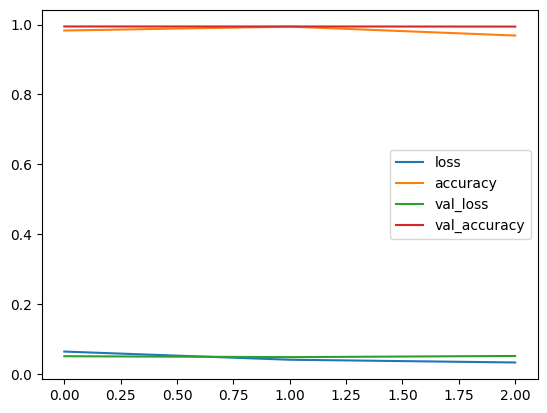

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(hist).plot()
plt.show()

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 200)          40000000  
                                                                 
 bidirectional (Bidirection  (None, 64)                59648     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 40102534 (152.98 MB)
Trainable params: 40102534 (152.98 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [36]:
# --------------------Taken from Kaggle ------------------------------------
labels = train_df.columns[2:].to_numpy()

train_sentences = train_df["comment_text"]
train_labels = train_df.iloc[:, 2:]

from sklearn.model_selection import train_test_split

# Split the data into training set, test set and validation set
train_df, test_df = train_test_split(train_df, train_size=0.8, random_state=210)
train_df, val_df = train_test_split(train_df, train_size=0.8, random_state=20)

# Split the dataset into sentences and labels
train_sentences = train_df["comment_text"]
train_labels = train_df.iloc[:, 2:]
train_labels
# print(type(train_labels))

,toxic,severe_toxic,obscene,threat,insult,identity_hate
75849,0,0,0,0,0,0
40029,0,0,0,0,0,0
134016,0,0,0,0,0,0
105035,1,1,1,0,1,0
16925,0,0,0,0,0,0
...,...,...,...,...,...,...
89789,0,0,0,0,0,0
143939,0,0,0,0,0,0
30646,0,0,0,0,0,0
118931,0,0,0,0,0,0


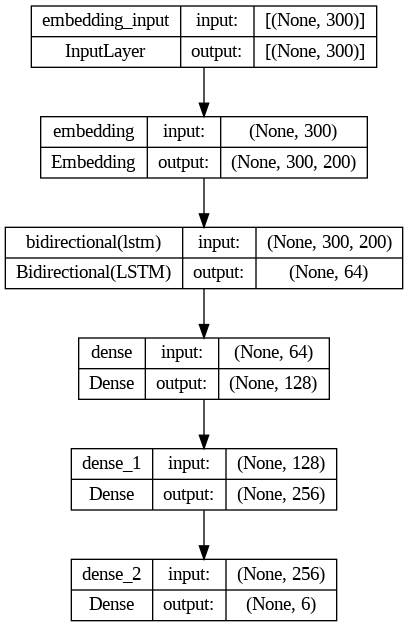

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)


In [34]:
# --------------------From Kaggle---------------------------
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Calculate the precision, recall, and F1 scores of the model
predictions = model.predict(test_sequences)

# Convert probability values to binary predictions (threshold can be adjusted)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Calculate the precision, recall, and F1 scores of each label
precision = precision_score(test_labels, binary_predictions, average='weighted')
recall = recall_score(test_labels, binary_predictions, average='weighted')
f1 = f1_score(test_labels, binary_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(test_labels, binary_predictions)
print(class_report)

1013/1013 [==============================] - 13s 11ms/step
Precision: 0.802708488913533
Recall: 0.6477033291192583
F1 Score: 0.7045669620782843
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      3089
           1       0.58      0.28      0.38       326
           2       0.86      0.76      0.80      1722
           3       0.00      0.00      0.00        83
           4       0.80      0.55      0.65      1621
           5       0.69      0.04      0.07       278

   micro avg       0.82      0.65      0.73      7119
   macro avg       0.63      0.40      0.45      7119
weighted avg       0.80      0.65      0.70      7119
 samples avg       0.07      0.06      0.06      7119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
# --------------------Taken from kaggle------------------
# Calculate the test accuracy of the model
test_accuracy = model.evaluate(test_sequences, test_labels)
print("Test Accuracy:", test_accuracy[1])  # test_accuracy[1] contains the value of the test accuracy

639/639 [==============================] - 9s 13ms/step - loss: 0.0547 - accuracy: 0.9904
Test Accuracy: 0.9904038906097412


In [38]:
# --------------------Taken from kaggle------------------
model.save("model_Toxic.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
import pickle

In [40]:
pickle.dump(model, open('model_Toxic_2.pkl','wb'))

In [41]:
# --------------------Taken from kaggle------------------
def predict(sentence):
    # convert sentence to sequence
    sequences = tokenizer.texts_to_sequences([sentence])
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # get predictions for toxicity
    predictions = model.predict(padded_sequences)[0]

    return list(zip(labels, predictions))

In [42]:
predict("'You freaking suck! I am going to hit you.'")

1/1 [==============================] - 1s 708ms/step


[('toxic', 0.9816311),
 ('severe_toxic', 0.34300837),
 ('obscene', 0.88238245),
 ('threat', 0.15762998),
 ('insult', 0.7713037),
 ('identity_hate', 0.3053185)]

In [ ]:
tf.math.confusion_matrix(
    labels,
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

UnimplementedError: {{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cast string to int64 is not supported [Op:Cast] name: 